In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import mplcursors
import statsmodels.api as sm
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset pour les anomalies de température terrestres, océaniques et globales

In [13]:
data_land_temperatures = pd.read_csv("data_land_temperatures.csv", skiprows=4)
data_land_temperatures

,Year,Anomaly
0,185001,-0.95
1,185002,-0.25
2,185003,-0.47
3,185004,-0.43
4,185005,-0.45
...,...,...
2080,202305,1.19
2081,202306,1.37
2082,202307,1.41
2083,202308,1.66


In [14]:
data_land_temperatures['Year'] = data_land_temperatures['Year'].astype(str)
data_land_temperatures['Month'] = data_land_temperatures['Year'].str.slice(start = -2).astype(int)
data_land_temperatures['Year'] = data_land_temperatures['Year'].str.slice(stop=-2).astype(int)

data_land_temperatures = data_land_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_land_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [15]:
data_land_temperatures

,Year,Month,Anomaly
0,1850,1,-0.95
1,1850,2,-0.25
2,1850,3,-0.47
3,1850,4,-0.43
4,1850,5,-0.45
...,...,...,...
2080,2023,5,1.19
2081,2023,6,1.37
2082,2023,7,1.41
2083,2023,8,1.66


In [16]:
data_land_temperatures['Month'] = data_land_temperatures['Month'].replace({})

In [17]:
data_land_mean_temperatures = data_land_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_land_mean_temperatures = data_land_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_land_mean_temperatures

,Year,averageAnomaly
0,1850,-0.373333
1,1851,-0.246667
2,1852,-0.343333
3,1853,-0.336667
4,1854,-0.265833
...,...,...
169,2019,1.508333
170,2020,1.647500
171,2021,1.371667
172,2022,1.430000


<AxesSubplot:xlabel='Year'>

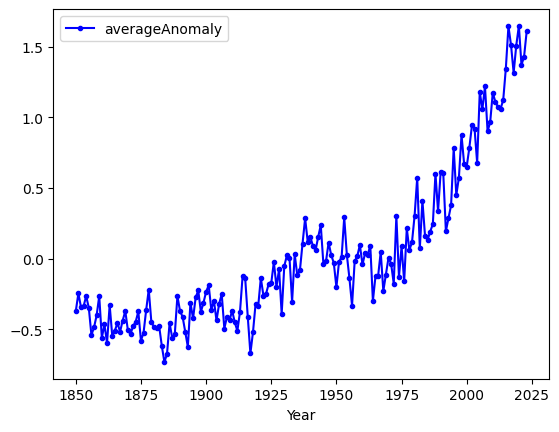

In [18]:
data_land_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [19]:
data_ocean_temperatures = pd.read_csv("data_ocean_temperatures.csv", skiprows=4)
data_ocean_temperatures

,Year,Anomaly
0,185001,-0.10
1,185002,-0.07
2,185003,-0.12
3,185004,-0.08
4,185005,-0.07
...,...,...
2080,202305,0.84
2081,202306,0.92
2082,202307,1.00
2083,202308,1.03


In [20]:
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].astype(str)
data_ocean_temperatures['Month'] = data_ocean_temperatures['Year'].str.slice(start = -2).astype(int)
data_ocean_temperatures['Year'] = data_ocean_temperatures['Year'].str.slice(stop=-2).astype(int)

data_ocean_temperatures = data_ocean_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_ocean_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [21]:
data_ocean_mean_temperatures = data_ocean_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_ocean_mean_temperatures = data_ocean_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_ocean_mean_temperatures

,Year,averageAnomaly
0,1850,-0.058333
1,1851,0.003333
2,1852,0.027500
3,1853,0.009167
4,1854,-0.016667
...,...,...
169,2019,0.738333
170,2020,0.725000
171,2021,0.630833
172,2022,0.669167


<AxesSubplot:xlabel='Year'>

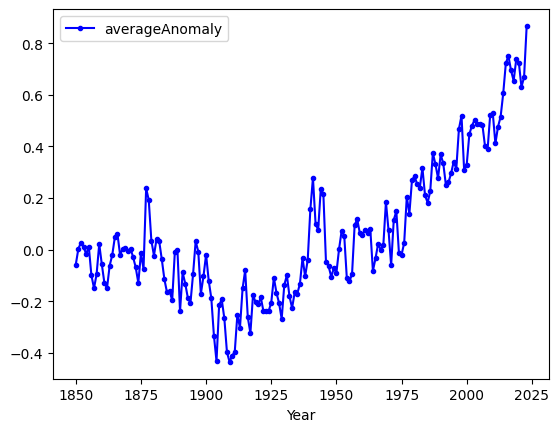

In [22]:
data_ocean_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [23]:
data_global_temperatures = pd.read_csv("global_land_ocean_temperatures.csv", skiprows=4)
data_global_temperatures

,Year,Anomaly
0,185001,-0.37
1,185002,-0.12
2,185003,-0.23
3,185004,-0.19
4,185005,-0.19
...,...,...
2080,202305,0.95
2081,202306,1.06
2082,202307,1.13
2083,202308,1.22


In [24]:
data_global_temperatures['Year'] = data_global_temperatures['Year'].astype(str)
data_global_temperatures['Month'] = data_global_temperatures['Year'].str.slice(start = -2).astype(int)
data_global_temperatures['Year'] = data_global_temperatures['Year'].str.slice(stop=-2).astype(int)

data_global_temperatures = data_global_temperatures[['Year', 'Month', 'Anomaly']]
print(f"Nombre de valeurs manquantes : {data_global_temperatures['Month'].isna().sum()}")

Nombre de valeurs manquantes : 0


In [25]:
data_global_mean_temperatures = data_global_temperatures.groupby('Year')['Anomaly'].mean().reset_index()
data_global_mean_temperatures = data_global_mean_temperatures.rename(columns={'Anomaly': 'averageAnomaly'})

data_global_mean_temperatures

,Year,averageAnomaly
0,1850,-0.156667
1,1851,-0.074167
2,1852,-0.085833
3,1853,-0.096667
4,1854,-0.091667
...,...,...
169,2019,0.978333
170,2020,1.010833
171,2021,0.860000
172,2022,0.905833


<AxesSubplot:xlabel='Year'>

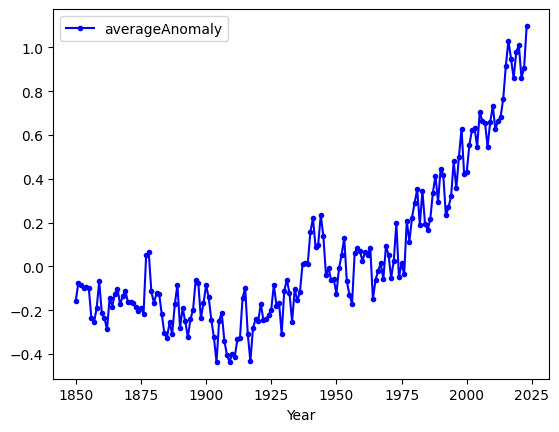

In [26]:
data_global_mean_temperatures.plot(x='Year', y='averageAnomaly', kind='line', marker='.', linestyle='-', color='b')

In [27]:
data_mean_temperatures = data_ocean_mean_temperatures.merge(data_land_mean_temperatures, on="Year", how="inner",suffixes=("-ocean","-land")).merge(data_global_mean_temperatures, on="Year", how="inner").rename(columns={'averageAnomaly':'averageAnomaly-global'})
data_mean_temperatures

,Year,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
0,1850,-0.058333,-0.373333,-0.156667
1,1851,0.003333,-0.246667,-0.074167
2,1852,0.027500,-0.343333,-0.085833
3,1853,0.009167,-0.336667,-0.096667
4,1854,-0.016667,-0.265833,-0.091667
...,...,...,...,...
169,2019,0.738333,1.508333,0.978333
170,2020,0.725000,1.647500,1.010833
171,2021,0.630833,1.371667,0.860000
172,2022,0.669167,1.430000,0.905833


In [28]:
data_mean_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   174 non-null    int64  
 1   averageAnomaly-ocean   174 non-null    float64
 2   averageAnomaly-land    174 non-null    float64
 3   averageAnomaly-global  174 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.8 KB


# Prédictions sur les températures globales, terrestres et maritimes

Utilisation d'un modèle ARMA

<AxesSubplot:xlabel='Year'>

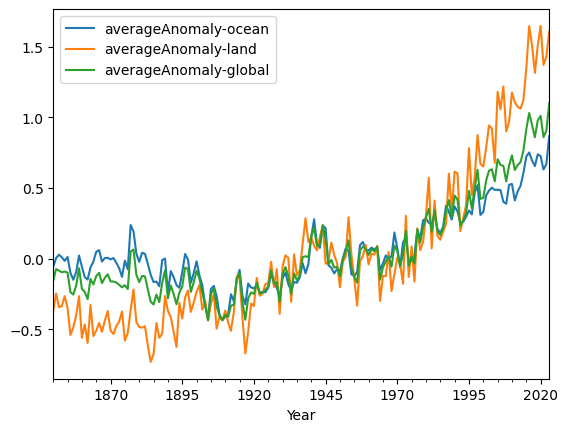

In [29]:
data_mean_temperatures['Year'] = pd.to_datetime(data_mean_temperatures['Year'], format='%Y')
data_mean_temperatures.set_index('Year', inplace=True)

data_mean_temperatures.plot()

In [30]:
data_mean_temperatures

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
Year,,,
1850-01-01,-0.058333,-0.373333,-0.156667
1851-01-01,0.003333,-0.246667,-0.074167
1852-01-01,0.027500,-0.343333,-0.085833
1853-01-01,0.009167,-0.336667,-0.096667
1854-01-01,-0.016667,-0.265833,-0.091667
...,...,...,...
2019-01-01,0.738333,1.508333,0.978333
2020-01-01,0.725000,1.647500,1.010833
2021-01-01,0.630833,1.371667,0.860000


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Supposons que 'data_mean_temperatures' est votre DataFrame et a été chargé correctement.

# 1. Normalisation
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_mean_temperatures)

# 2. Conversion en DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data_mean_temperatures.columns, index=data_mean_temperatures.index)

# 3. Séquences d'entrée avec des décalages
taille_fenetre = 10  
X = []
y = []

for i in range(taille_fenetre, len(data_scaled)):
    X.append(data_scaled.iloc[i-taille_fenetre:i].values)
    y.append(data_scaled.iloc[i]['averageAnomaly-global'])

X = np.array(X)
y = np.array(y)

In [32]:
X.shape

(164, 10, 3)

In [33]:
taille_fenetre = 10

# Sélection des données de validation
valid_set = data_mean_temperatures[data_mean_temperatures.index.year <= 2000]

# Normalisation l'ensemble de validation
valid_set_scaled = scaler.transform(valid_set)

# Préparez les données de validation de la même manière que les données d'entraînement
X_valid = []
y_valid = []

for i in range(taille_fenetre, len(valid_set_scaled)):
    X_valid.append(valid_set_scaled[i-taille_fenetre:i])
    y_valid.append(valid_set_scaled[i, -1])  # Supposons que la dernière colonne est la cible

# Convertissez les listes en tableaux numpy pour l'entraînement
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)


In [34]:
valid_set

,averageAnomaly-ocean,averageAnomaly-land,averageAnomaly-global
Year,,,
1850-01-01,-0.058333,-0.373333,-0.156667
1851-01-01,0.003333,-0.246667,-0.074167
1852-01-01,0.027500,-0.343333,-0.085833
1853-01-01,0.009167,-0.336667,-0.096667
1854-01-01,-0.016667,-0.265833,-0.091667
...,...,...,...
1996-01-01,0.313333,0.450000,0.355833
1997-01-01,0.467500,0.574167,0.499167
1998-01-01,0.520000,0.875000,0.629167


In [35]:
y_valid

array([0.14453903, 0.13041116, 0.09726499, 0.19072632, 0.16464409,
       0.20322405, 0.21843869, 0.17116464, 0.19507336, 0.21191813,
       0.17877196, 0.17822858, 0.17388154, 0.16301395, 0.15160297,
       0.16138381, 0.14345227, 0.31679044, 0.32602789, 0.20974461,
       0.17551168, 0.20431081, 0.20213729, 0.14127875, 0.08531063,
       0.07226952, 0.11791342, 0.08313711, 0.17170802, 0.23039304,
       0.10106865, 0.16029705, 0.12063032, 0.07335628, 0.12715088,
       0.15540663, 0.24289078, 0.23528346, 0.13041116, 0.17388154,
       0.22821953, 0.19181308, 0.12552074, 0.07335628, 0.        ,
       0.12171708, 0.14671255, 0.06303206, 0.02119181, 0.        ,
       0.02445209, 0.01521464, 0.06683572, 0.07118276, 0.19072632,
       0.21898207, 0.08259373, 0.00217352, 0.10106865, 0.12769426,
       0.1211737 , 0.17333816, 0.12334722, 0.1266075 , 0.13964861,
       0.15595001, 0.22984966, 0.16790437, 0.17551168, 0.08368049,
       0.21191813, 0.2450643 , 0.20376743, 0.12008694, 0.21572

In [36]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

# Configuration du modèle
LATENT_DIM = 5  # nombre d'unités dans la couche RNN
BATCH_SIZE = 32  # nombre d'échantillons par mini-lot
EPOCHS = 10  # nombre maximum de fois que l'algorithme d'entraînement passera à travers tous les échantillons

# Construction du modèle
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(10, 3)))  
model.add(Dense(1)) 

# Compilation du modèle
model.compile(optimizer='RMSprop', loss='mse')

# Résumé du modèle
model.summary()


2023-11-13 18:20:36.199552: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 150       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 156 (624.00 Byte)
Trainable params: 156 (624.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
X_train = np.array(X)
y_train = np.array(y)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)


(164, 10, 3)
(164,)
(141, 10, 3)
(141,)


In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_train[:1])  # Affiche le premier élément pour vérifier
print(y_train[:1])  # Affiche le premier élément pour vérifier


(164, 10, 3)
(164,)
[[[0.28958023 0.15061296 0.18203224]
  [0.33688472 0.20385289 0.23582684]
  [0.35542297 0.16322242 0.22821953]
  [0.34135947 0.16602452 0.22115559]
  [0.32154272 0.19579685 0.22441587]
  [0.34327722 0.16112084 0.21952545]
  [0.25761773 0.08021016 0.1293244 ]
  [0.21926273 0.10262697 0.11791342]
  [0.26145323 0.13835377 0.15921029]
  [0.35094822 0.19579685 0.2396305 ]]]
[0.14453903]


In [42]:

# Configuration de votre modèle
LATENT_DIM = 5  # nombre d'unités dans la couche RNN
BATCH_SIZE = 32  # nombre d'échantillons par mini-lot
EPOCHS = 10  # nombre maximum de fois que l'algorithme d'entraînement passera à travers tous les échantillons
TAILLE_FENETRE = 10  # la taille de la fenêtre temporelle utilisée pour vos données d'entraînement
NOMBRE_DE_CARACTERISTIQUES = 3  # le nombre de caractéristiques utilisées dans vos données d'entraînement

# Construction du modèle
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(TAILLE_FENETRE, NOMBRE_DE_CARACTERISTIQUES)))
model.add(Dense(1)) 

# Compilation du modèle
model.compile(optimizer='RMSprop', loss='mse')

# Initialisation du callback EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

# Entraînement du modèle avec les données préparées précédemment
history = model.fit(
    X_train,  
    y_train, 
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid), 
    callbacks=[earlystop],
    verbose=1
)

Epoch 1/10
6/6 [==============================] - 3s 124ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 2/10
6/6 [==============================] - 0s 52ms/step - loss: 0.0059 - val_loss: 0.0048
Epoch 3/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 4/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0054 - val_loss: 0.0059
Epoch 5/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 6/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 7/10
6/6 [==============================] - 0s 23ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 8/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 9/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 10/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0050 - val_loss: 0.0048


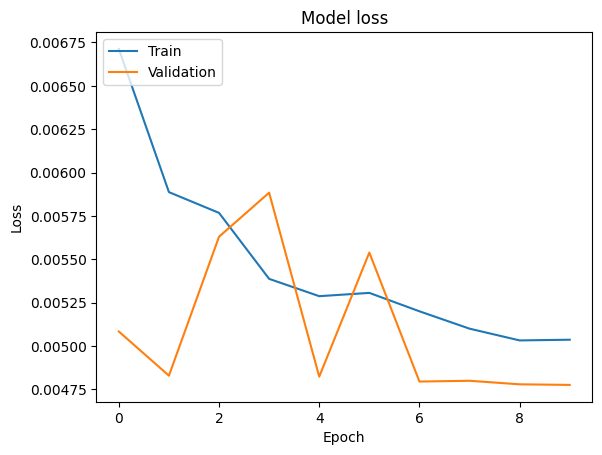

In [43]:
# Affichage des pertes en entrainement et validation
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Diminution rapide de la perte : La courbe de perte d'entraînement (Train) chute rapidement, ce qui suggère que le modèle apprend efficacement à partir des données d'entraînement.

Convergence des courbes : Les courbes de perte d'entraînement et de validation (Validation) semblent converger, ce qui est un bon signe indiquant que le modèle ne surapprend pas trop (overfitting) sur les données d'entraînement.

Stabilisation de la perte de validation : La perte de validation semble se stabiliser après quelques epochs, ce qui peut indiquer que des époques supplémentaires pourraient ne pas apporter d'amélioration significative.

In [44]:
#annee_la_plus_recente = data_mean_temperatures.index.year.max()
#
#valid_set = data_mean_temperatures[data_mean_temperatures.index.year >= 2000]
#
#test_set = data_mean_temperatures['2000-01-01':'2030-01-01']
#test_set_scaled = scaler.transform(test_set)

taille_fenetre = 10

# Normalisation de l'ensemble de validation
data_test_scaled = scaler.transform(data_mean_temperatures)

X_test = []
y_test = []

taille_fenetre = 10  

for i in range(taille_fenetre, len(data_test_scaled)):
    X_test.append(data_test_scaled[i-taille_fenetre:i])  # Séquences d'entrée
    y_test.append(data_test_scaled[i, -1])  # Sortie correspondante

# Conversion des listes en tableaux numpy pour le modèle
X_test = np.array(X_test)
y_test = np.array(y_test)


In [47]:
predictions = model.predict(X_test)
predictions

6/6 [==============================] - 1s 3ms/step


array([[ 0.1998708 ],
       [ 0.18231645],
       [ 0.16580877],
       [ 0.14163747],
       [ 0.16266875],
       [ 0.16706288],
       [ 0.18787536],
       [ 0.2088781 ],
       [ 0.20389068],
       [ 0.21069634],
       [ 0.21982378],
       [ 0.21304792],
       [ 0.20977771],
       [ 0.20535165],
       [ 0.19621968],
       [ 0.18280241],
       [ 0.179919  ],
       [ 0.17118786],
       [ 0.2353712 ],
       [ 0.2806138 ],
       [ 0.26635584],
       [ 0.24451885],
       [ 0.24229608],
       [ 0.23931354],
       [ 0.21271822],
       [ 0.17242506],
       [ 0.1398132 ],
       [ 0.13416144],
       [ 0.11281995],
       [ 0.1372559 ],
       [ 0.17483526],
       [ 0.14484698],
       [ 0.15145978],
       [ 0.13999781],
       [ 0.11438593],
       [ 0.11745049],
       [ 0.1303587 ],
       [ 0.17371455],
       [ 0.19899386],
       [ 0.17291997],
       [ 0.17455691],
       [ 0.19699818],
       [ 0.19476941],
       [ 0.16629848],
       [ 0.12365356],
       [ 0

In [48]:
# Création d'un tableau de zéros avec la forme attendue (164, 3)
data_to_inverse = np.zeros((predictions.shape[0], 3))

# Supposons que les prédictions correspondent à la première caractéristique
data_to_inverse[:, 0] = predictions.ravel()

# Inversion de la mise à l'échelle
predictions_inversed = scaler.inverse_transform(data_to_inverse)[:, 0]

data_to_inverse[:, 0] = y_test
y_test_inversed = scaler.inverse_transform(data_to_inverse)[:, 0]


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inversed, predictions_inversed)
mae = mean_absolute_error(y_test_inversed, predictions_inversed)


MSE: 0.008681566781024901, MAE: 0.07759873655889683


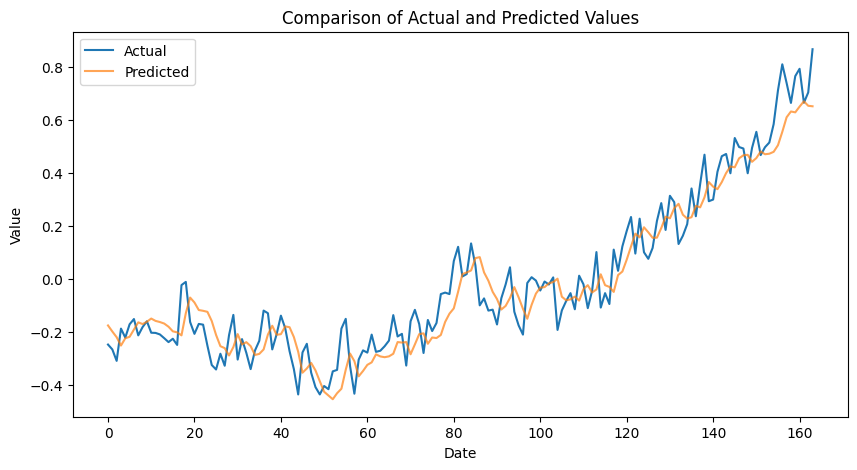

In [51]:
print(f"MSE: {mse}, MAE: {mae}")

# Affichage des prédictions et valeurs réelles
plt.figure(figsize=(10, 5))
plt.plot(y_test_inversed, label='Actuel')
plt.plot(predictions_inversed, label='Prédiction', alpha=0.7)
plt.title('Comparaison entre les valeurs actuelles et les prédictions')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()

Suivi de la Tendance : Le modèle semble capturer la tendance ascendante des données, ce qui est bon signe pour la prédiction de séries temporelles, surtout pour des données qui pourraient avoir une tendance linéaire ou polynomiale.

Réaction aux Fluctuations : Il semble y avoir quelques écarts entre les valeurs réelles et prédites, notamment là où les données réelles présentent des fluctuations. Cela pourrait indiquer que le modèle pourrait être amélioré pour capturer de manière plus précise les fluctuations à court terme.

Échelle des Prédictions : Les prédictions semblent être légèrement décalées vers le bas par rapport aux valeurs réelles. Cela pourrait indiquer un biais dans le modèle ou une nécessité d'ajuster davantage le processus de normalisation et de dénormalisation des données.

Performance à Long Terme : Sans connaître les valeurs exactes sur l'axe des ordonnées et des abscisses, il est difficile de juger de la performance quantitative du modèle. Cependant, visuellement, le modèle semble performant.

**Prolongation de la courbe** : Méthode multi step

In [53]:
# 5 unités de sortie pour 5 étapes à l'avance
model.add(Dense(10))  

In [54]:
current_input = X_test[-1]  # Première séquence comme point de départ
predictions = []  # Stockage des prédiction

for _ in range(27):
    # Prédiction de la prochaine étape
    next_step_prediction = model.predict(current_input.reshape(1, TAILLE_FENETRE, NOMBRE_DE_CARACTERISTIQUES))

    # Ajout de la prédiction à la liste des prédictions
    predictions.append(next_step_prediction[0])

    # Mise à jour de l'entrée actuelle pour inclure la nouvelle prédiction
    current_input = current_input.reshape((1, TAILLE_FENETRE, NOMBRE_DE_CARACTERISTIQUES))
    current_input[:, :-1, :] = current_input[:, 1:, :]  # Décalage de toutes les valeurs d'une étape vers la gauche
    current_input[:, -1, :] = next_step_prediction  # Remplacement de la dernière valeur par la nouvelle prédiction




1/1 [==============================] - 0s 71ms/step


In [56]:
values_to_add = predictions_inversed

# Conversion en un tableau 2D pour correspondre à la structure de predictions
values_to_add_2d = values_to_add.reshape(-1, 1)

# Concaténation des tableaux maintenant qu'ils ont le même nombre de dimensions
new_predictions = np.concatenate((values_to_add_2d, predictions), axis=0)


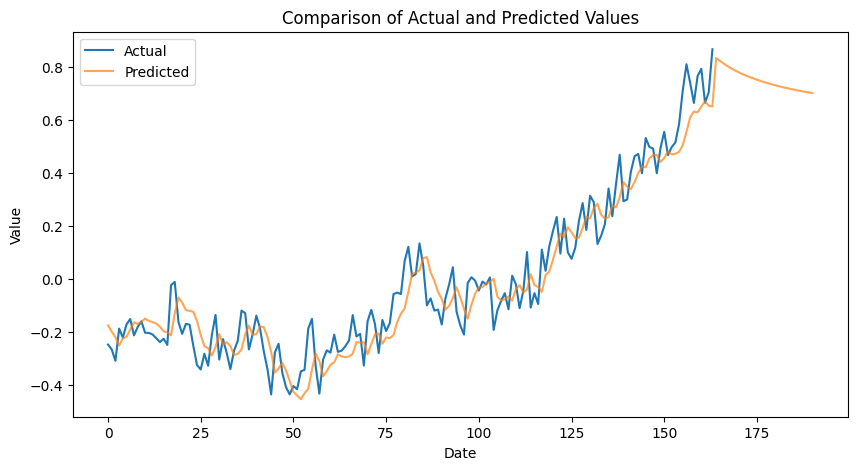

In [57]:

# Affichage des prédictions prolongées et valeurs réelles
plt.figure(figsize=(10, 5))
plt.plot(y_test_inversed, label='Actuel')
plt.plot(new_predictions, label='Prédiction', alpha=0.7)
plt.title('Comparaison entre les valeurs actuelles et les prédictions')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.legend()
plt.show()

In [58]:
# Sauvegarde du modèle
#model.save('')

INFO:tensorflow:Assets written to: RNN_Data_mean_temperatures/assets


INFO:tensorflow:Assets written to: RNN_Data_mean_temperatures/assets
